# ADABOOST-GLASS-CLASSIFICATION

## ------- DATA EXPLORATION -------

### Load dataset
Load the downloaded .data file and assign column names. In this case it was required to change the data type of the target column [Y] from integer to string. 

In [1]:
import pandas as pd

all_cols = ['ID','Ri','Na','Mg','Al','SI','Po','Ca','Ba','Fe','Type']
feature_cols = ['Ri','Na','Mg','Al','SI','Po','Ca','Ba','Fe']
target_cols = ['Type']

df = pd.read_csv('../dataset/glass.data', names=all_cols)
df['Type'] = df[['Type']].applymap(str)  # change target data type to string
df = df.drop(['ID'], axis=1)  # remove the column ID
class_names = df['Type'].unique()

print(df) 

          Ri     Na    Mg    Al     SI    Po    Ca    Ba   Fe Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0    1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0    1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0    1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0    1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0    1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0    7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0    7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0    7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0    7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0    7

[214 rows x 10 columns]


### Define X (features) and y (target) variables

In [2]:
# separate feature and target values
y = df[target_cols]
X = df[feature_cols]

print ("Data Shape:\nX: {}\ny: {}".format(X.shape, y.shape))

print('\nPriting first 5 lines from X data :')
X.head()

Data Shape:
X: (214, 9)
y: (214, 1)

Priting first 5 lines from X data :


,Ri,Na,Mg,Al,SI,Po,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


### Check data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ri      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   SI      214 non-null    float64
 5   Po      214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


### Check data stats

In [4]:
df.describe()

,Ri,Na,Mg,Al,SI,Po,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


### Visualize distribution of classes from the collected data

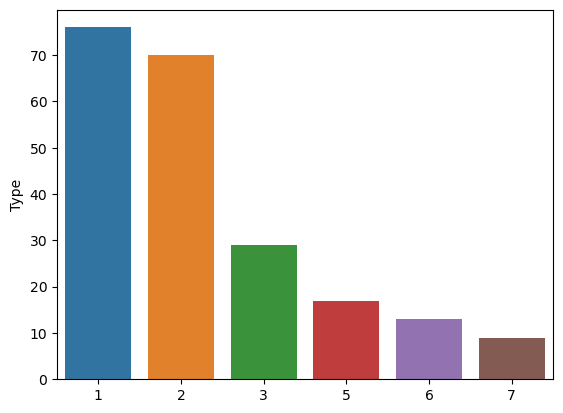

In [5]:
%matplotlib inline
import seaborn as sns

sns.barplot(data=df, x=y['Type'].unique(), y=y['Type'].value_counts());

### Map the correlation among the features

C:\Users\gerardo.paniagua\AppData\Local\Temp\ipykernel_4816\3381690097.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
C:\Users\gerardo.paniagua\AppData\Local\Temp\ipykernel_4816\3381690097.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='Spectral', annot = True, linewidths=.5, fmt = ".2f", ax=ax)


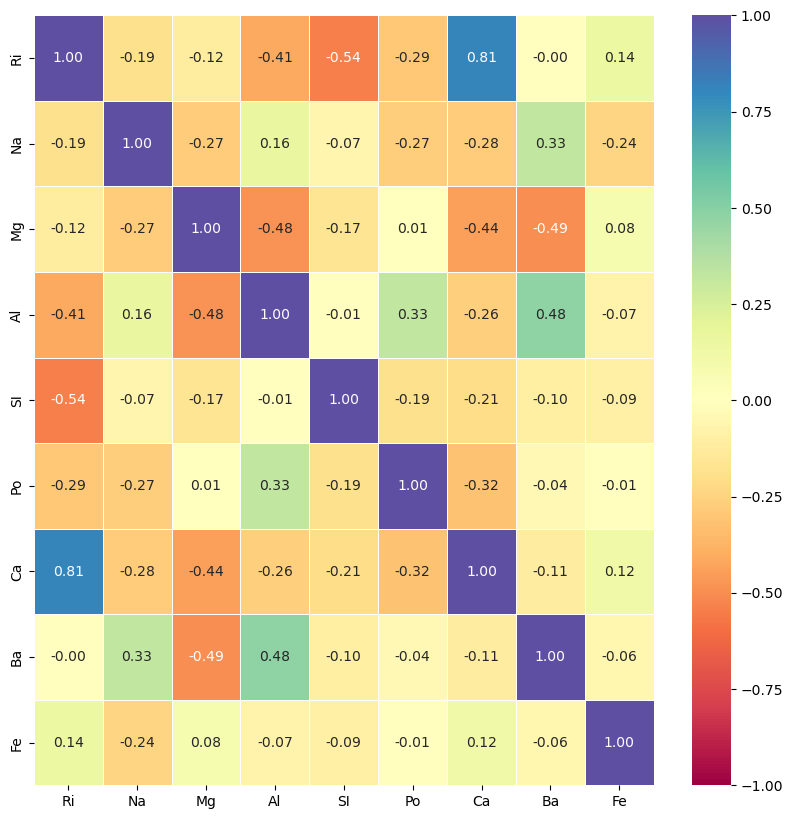

In [6]:
import matplotlib.pyplot as plt

#correlation map view
df.corr() 
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='Spectral', annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()

### Visualize the correlation among the features and the classes

CPU times: total: 12.7 s
Wall time: 12.8 s


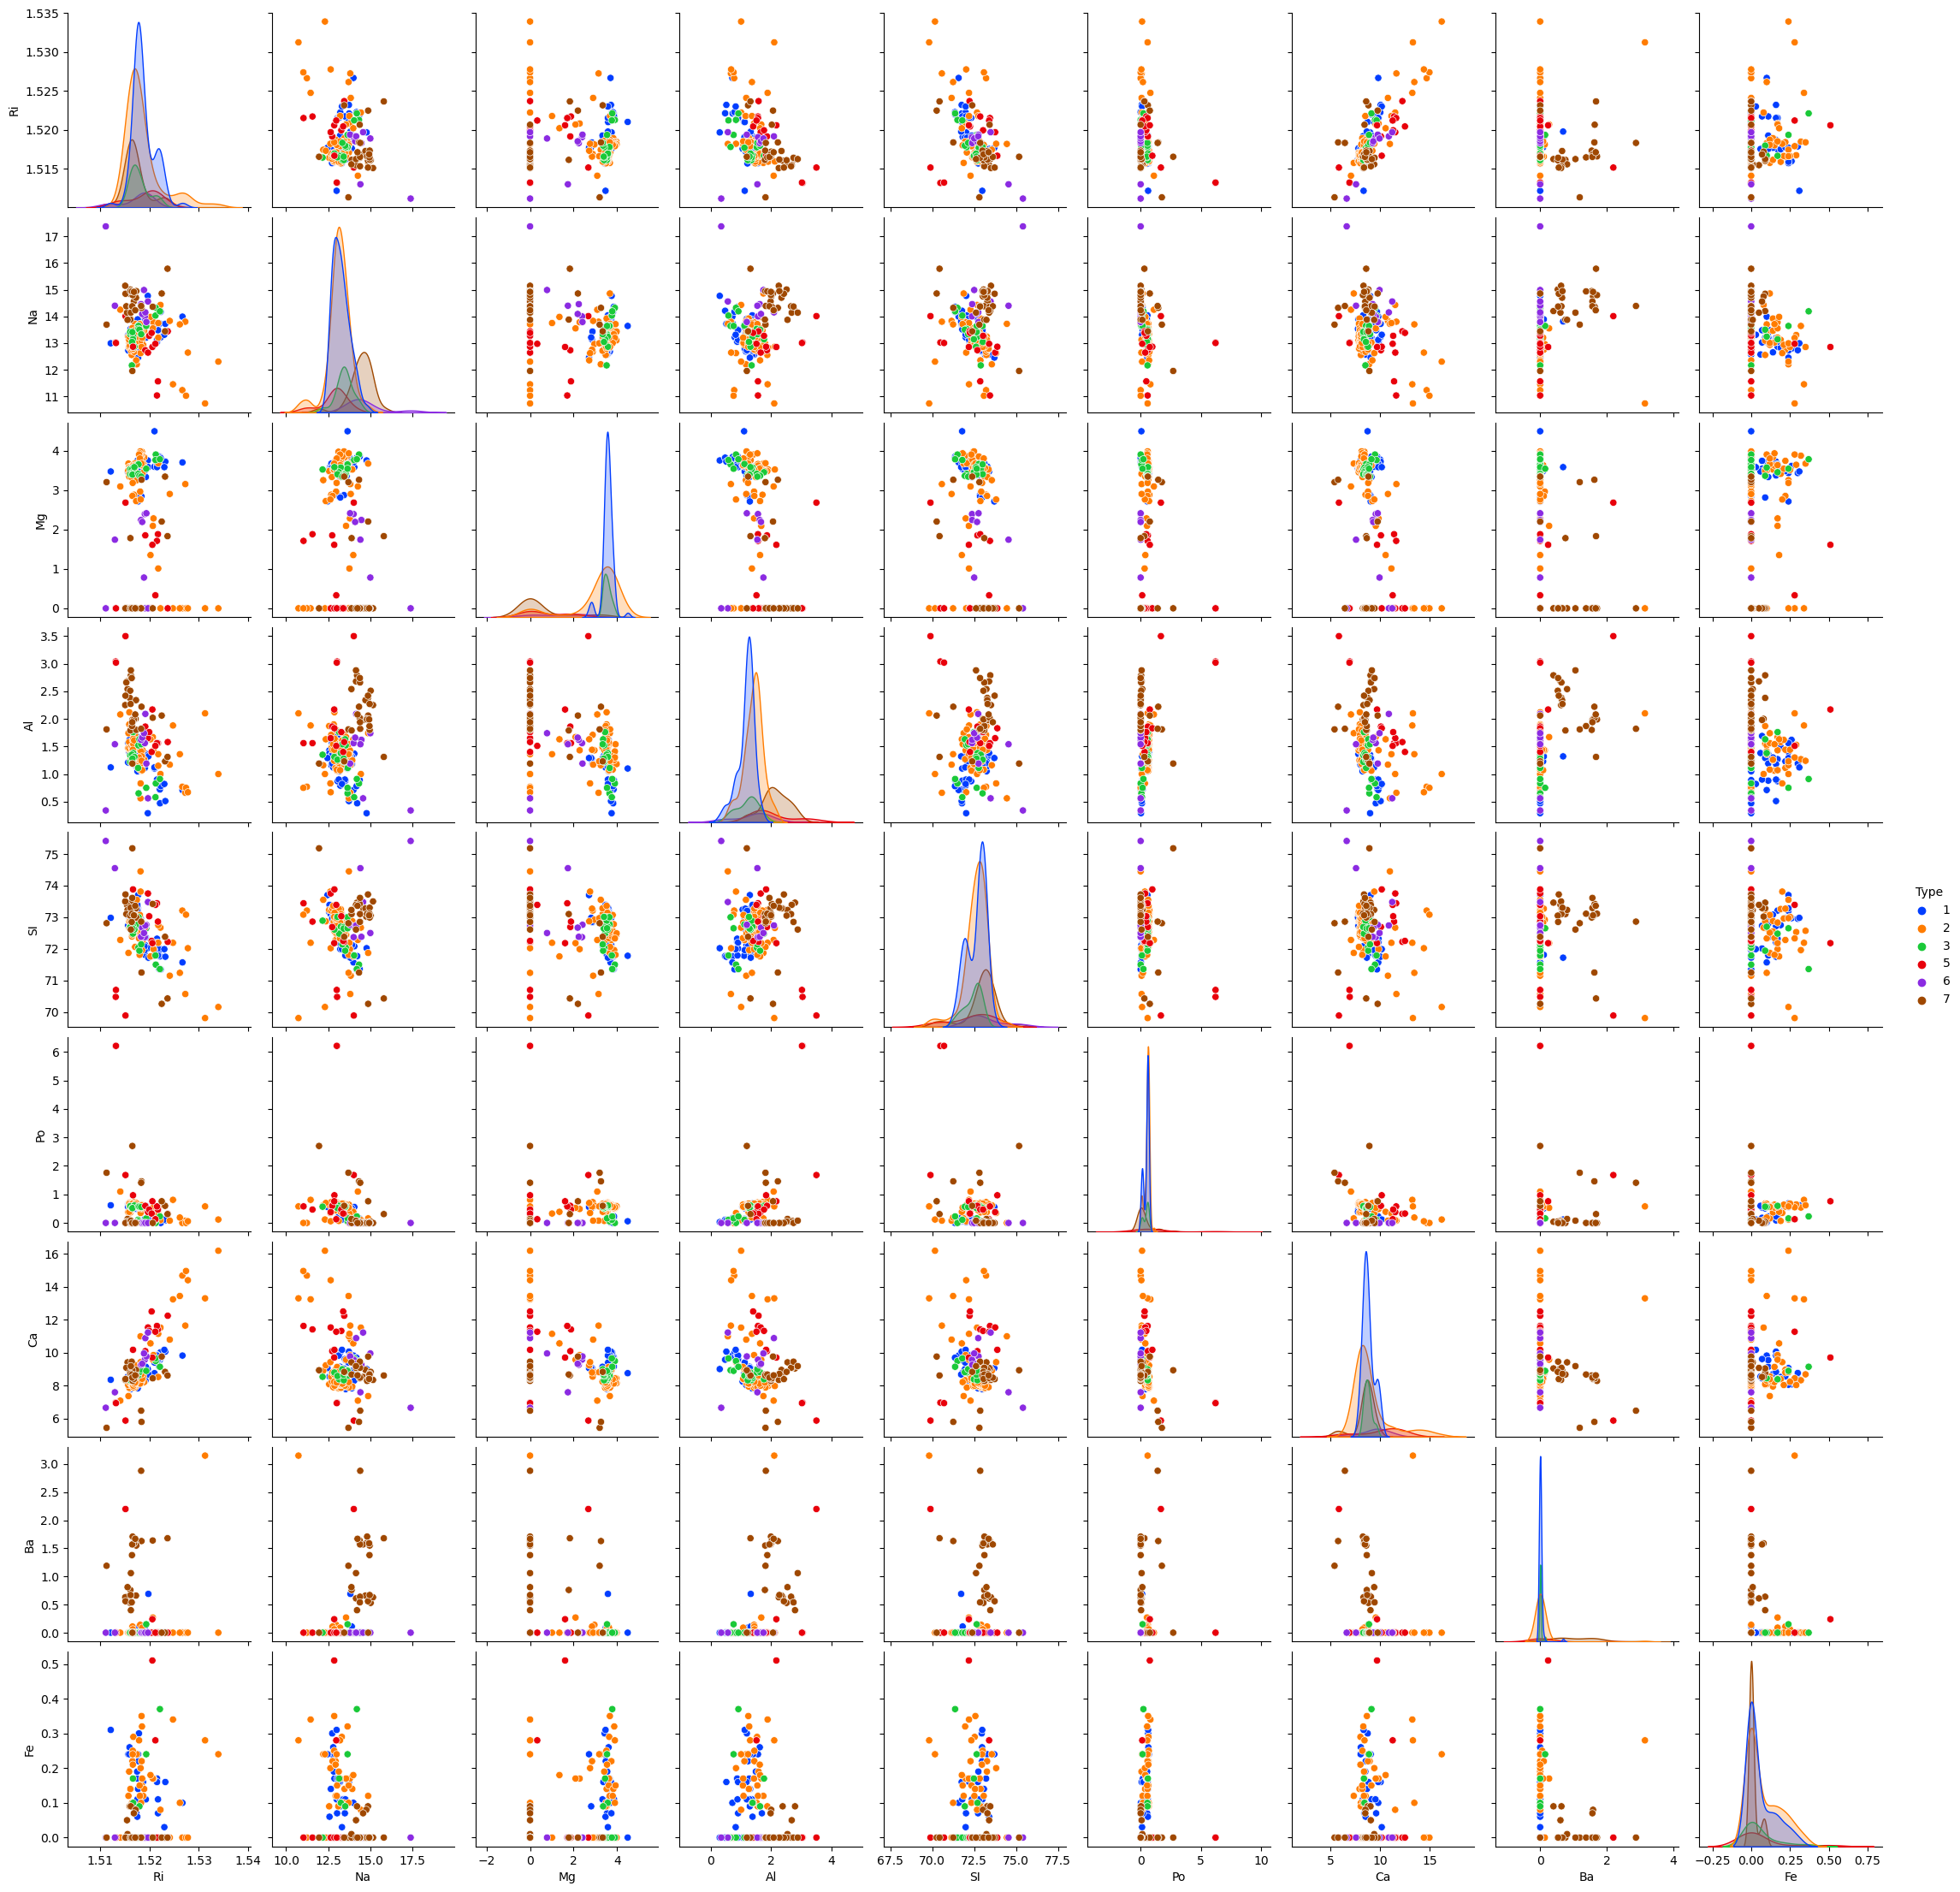

In [7]:
%%time

g = sns.pairplot(df, hue='Type', palette='bright');

## ------- MODEL TRAINING -------

### Split training and testing datasets

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print('X Train: ', X_train.shape)
print('y Train: ', y_train.shape)
print('X Test: ', X_test.shape)
print('y Test: ', y_test.shape)

X Train:  (149, 9)
y Train:  (149, 1)
X Test:  (65, 9)
y Test:  (65, 1)


### Train classification model and visualize the resulting graph

In [9]:
%%time
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier

# Define -Decision-tree- as our Machine Learning model for classification
clf = AdaBoostClassifier(random_state=42)

# Define PCA for feature reduction
pca = PCA()
n_components = list(range(1,X.shape[1]+1,1))

# Define MinMax as scaler for data normalization
scaler = MinMaxScaler(feature_range=(0,1))

# Set pipeline for training
pipe = Pipeline(steps=[("scaler", scaler),
                       ("pca", pca), 
                       ("adab", clf)])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {'pca__n_components': n_components,
              'adab__learning_rate': [0.1, 0.01, 0.001],
              'adab__algorithm':['SAMME', 'SAMME.R']
             }

# Define GridSearchCV for hyperparameter tunning
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, verbose=True, scoring='accuracy')
grid_search.fit(X_train, np.ravel(y_train))
best_model = grid_search.best_estimator_

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
print("\n The best estimator across ALL searched params:\n",
      grid_search.best_params_)
print("\n The best training score across ALL searched params:\n",
      grid_search.best_score_)
print("\n The best PCA n_component across ALL searched params:\n",
      best_model.get_params()['pca__n_components'])
print("\n ========================================================")

Fitting 5 folds for each of 54 candidates, totalling 270 fits

 Results from Grid Search 

 The best estimator across ALL searched params:
 {'adab__algorithm': 'SAMME.R', 'adab__learning_rate': 0.1, 'pca__n_components': 5}

 The best training score across ALL searched params:
 0.48344827586206895

 The best PCA n_component across ALL searched params:
 5

CPU times: total: 1min 8s
Wall time: 18 s


In [10]:
#means = grid_search.cv_results_['mean_test_score']
#stds  = grid_search.cv_results_['std_test_score']
#params= grid_search.cv_results_['params']

#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

### Calculate model accuracy score

In [11]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.42      0.74      0.54        19
           2       0.27      0.13      0.18        23
           3       0.00      0.00      0.00         4
           5       0.33      0.17      0.22         6
           6       0.00      0.00      0.00         3
           7       0.56      1.00      0.71        10

    accuracy                           0.43        65
   macro avg       0.26      0.34      0.28        65
weighted avg       0.34      0.43      0.35        65



C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Visualize Confusion Matrix

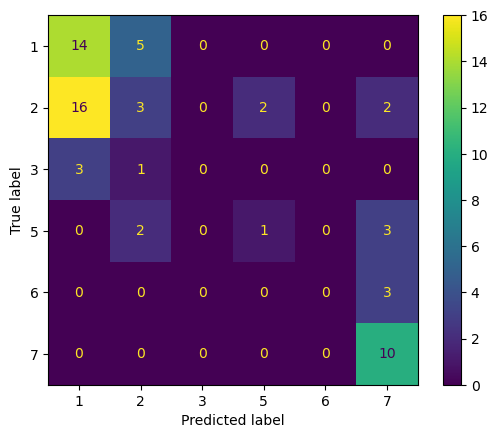

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)
cmd.plot();